**Review**
  
Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job! The project is accepted. Good luck on the next sprint!

# Data Colection and Storage Course Project

***Project Description***

You're working as an analyst for Zuber, a new ride-sharing company that's
launching in Chicago. Your task is to find patterns in the available information. You
want to understand passenger preferences and the impact of external factors on
rides.

Working with a database, you'll analyze data from competitors and test a
hypothesis about the impact of weather on ride frequency.

***Step 1 - performed in Yandex platform***
- Parse the data

***Step 2 - performed in Yandex platform***
- Exploratory data analysis
    - Find the number of taxi rides for each taxi company for November 15-16, 2017
    - Find the number of rides for every taxi company whose name contains the words "Yellow" or "Blue" for November 1-7, 2017
    - In November 2017, the most popular taxi companies were Flash Cab and Taxi Affiliation Services. Find the number of rides for these two companies

***Step 3 - performed in Yandex platform***
- Prepare the data to test the hypothesis that the duration of rides from the the Loop to O'Hare International Airport changes on rainy Saturdays

***Step 4 - performed in this notebook***
- From the data retrieved in Steps 1-3, there are 2 other files to be used:
    - project_sql_result_01.csv
        - contains:
            - company_name : taxi company name
            - trips_amount : the number of rides for each taxi company on November 15-16, 2017.
    - project_sql_result_04.csv
        - contains:
            - dropoff_location_name : Chicago neighborhoods where rides ended
            - average_trips : the average number of rides that ended in each neighborhood in November 2017

- Using python perform exploratory data analysis
    - import the files
    - study the data they contain
    - make sure the data types are correct
    - identify the top 10 neighborhoods in terms of drop-offs
    - create graphs: 
        - taxi companies and number of rides 
        - top 10 neighborhoods by number of dropoffs
    - draw conclusions based on each graph and explain the results
    
***Step 5 - performed in this notebook***
- Test the following hypothesis: "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."
    - Set the significance level (alpha) value on your own.
    - Explain:
        - how you formed the null and alternative hypotheses
        - what criterion you used to test the hypotheses and why
    - use project_sql_result_07.csv
        - contains:
            - start_ts - pickup date and time
            - weather_conditions - weather conditions at the moment the ride started
            - duration_seconds - ride duration in seconds

# Step 4

***Plan of Action***
- 4.a import libraries
- 4.b import the files, open the data files and study the general information
- 4.c data preprocessing
    - clean up the data and process where necessary
        - read and save working versions of data
        - identify missing values
        - identify duplicate rows
        - make sure the data types are correct
- 4.d calculate requested information
    - identify the top 10 neighborhoods in terms of drop-offs
    - create graphs: 
        - taxi companies and number of rides 
        - top 10 neighborhoods by number of dropoffs
    - draw conclusions based on each graph and explain the results

# 4.a Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import stats as st

# 4.b Import files and study the general information

In [2]:
# read and save original files
company_trips_orig = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff_orig = pd.read_csv('/datasets/project_sql_result_04.csv')
weather_orig = pd.read_csv('/datasets/project_sql_result_07.csv')

In [3]:
# examine dataframe
print('company and trips dataframe')
company_trips_orig.head()

company and trips dataframe


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
# examine general info
print('company and trips general info')
company_trips_orig.info()

company and trips general info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
print('number of unique taxi companies in this data:')
company_trips_orig['company_name'].value_counts(dropna=False).count()

number of unique taxi companies in this data:


64

In [6]:
# examine dataframe
print('dropoff dataframe')
dropoff_orig.head()

dropoff dataframe


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [7]:
# examine general info
print('dropoff general info')
dropoff_orig.info()

dropoff general info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
# examine dataframe
print('weather dataframe')
weather_orig.head()

weather dataframe


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [9]:
# examine general info
print('weather general info')
weather_orig.info()

weather general info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [10]:
print('number of unique weather conditions')
weather_orig['weather_conditions'].value_counts(dropna=False)

number of unique weather conditions


Good    888
Bad     180
Name: weather_conditions, dtype: int64

# 4.b Conclusion of original files and general information

- There are 64 unique taxi compnaies in this data set
- All columns in all files have the same amount of values, suggesting no missing values
- The weather data has a column with date/time info set as an object type - this will be changed below in data preprocessing
- The weather data has a column with values in seconds - this will be changed below in data preprocessing to be more readable
- There are 888 values for "Good" weather conditions and 180 for "Bad" weather conditions

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected!

</div>

# 4.c Data Preprocessing

***clean up the data and process where necessary***
- read and save working versions of data
- identify missing values
- identify duplicate rows
- make sure the data types are correct
- create readable/user friendly columns

In [11]:
# read and save working versions of data
company_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')
weather = pd.read_csv('/datasets/project_sql_result_07.csv')

***Identify missing values in each data set***

In [12]:
print('number of missing values in company_trips')
company_trips.isnull().sum()

number of missing values in company_trips


company_name    0
trips_amount    0
dtype: int64

In [13]:
print('number of missing values in dropoff')
dropoff.isnull().sum()

number of missing values in dropoff


dropoff_location_name    0
average_trips            0
dtype: int64

In [14]:
print('number of missing values in weather')
weather.isnull().sum()

number of missing values in weather


start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

***Identify duplicate rows in each data set***

In [15]:
print('number of duplicate rows in company_trips')
company_trips.duplicated().sum()

number of duplicate rows in company_trips


0

In [16]:
print('number of duplicate rows in dropoff')
dropoff.duplicated().sum()

number of duplicate rows in dropoff


0

In [17]:
print('number of duplicate rows in weather')
weather.duplicated().sum()

number of duplicate rows in weather


197

***Examine and process duplicate rows***

In [18]:
perc_dupls_weather = weather.duplicated().sum() / len(weather)
print('percent of duplicate rows in weather:\n{:.2%}'.format(perc_dupls_weather))

percent of duplicate rows in weather:
18.45%


In [19]:
# drop duplicate rows and reset index
weather = weather.drop_duplicates().reset_index(drop=True)
# confirm duplicates were removed
print('number of duplicate rows after duplicate rows were removed')
weather.duplicated().sum()

number of duplicate rows after duplicate rows were removed


0

***Change data types where appropriate***
- when examining original data the weather df was found to have a column with date/time info but is a object time
    - change to a datetime data type

In [20]:
print('weather info before data type change')
weather.info()

weather info before data type change
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            871 non-null    object 
 1   weather_conditions  871 non-null    object 
 2   duration_seconds    871 non-null    float64
dtypes: float64(1), object(2)
memory usage: 20.5+ KB


In [21]:
# change data type from object to datetime
weather['start_ts'] = pd.to_datetime(weather['start_ts'])
# confirm data type change
print('weather info after data type change')
weather.info()

weather info after data type change
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 20.5+ KB


***Change seconds to minutes***
- when examining original data the weather df was found to have a column with values in seconds, this is not user friendly to read
    - create a new column with values in minutes 
    - This is a more readable format for duration of rides

In [22]:
weather['duration_minutes'] = weather['duration_seconds'] / 60
weather.head()

,start_ts,weather_conditions,duration_seconds,duration_minutes
0,2017-11-25 16:00:00,Good,2410.0,40.166667
1,2017-11-25 14:00:00,Good,1920.0,32.000000
2,2017-11-25 12:00:00,Good,1543.0,25.716667
3,2017-11-04 10:00:00,Good,2512.0,41.866667
4,2017-11-11 07:00:00,Good,1440.0,24.000000


# 4.c Conclusion of data preprocessing

- There are no missing values in the data sets
- The weather data set had 197 duplicate rows
    - this accounted for 18.45% of the data
    - although this is above the 10% norm of deleting, I chose to delete these rows because they will cause skewed data in later processing
    - duplicates may have been caused by entry or data acquisition errors
- The column in weather containing date/time info was changed from object data type to datetime data type
- A column in weather was containing duration in seconds was used to create a new column containing duration in minutes to be more readable and user friendly

<div class="alert alert-success">
<b>Reviewer's comment</b>

Preprocessing looks good!

</div>

# 4.d Calculate requested information
- identify the top 10 neighborhoods in terms of drop-offs
- create graphs: 
    - taxi companies and number of rides 
    - top 10 neighborhoods by number of dropoffs
- draw conclusions based on each graph and explain the results

***Identify the top 10 neighborhoods in terms of drop-offs***

In [23]:
# sort the top 10 neighborhoods
print('The top 10 neighborhoods in terms of drop-offs:')
dropoff.sort_values(by='average_trips', ascending=False).head(10)

The top 10 neighborhoods in terms of drop-offs:


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


***Graph the top 10 neighborhoods by number of dropoffs***

In [24]:
# create a dataframe of top ten neighborhoods in terms of dropoffs
top_ten = dropoff.sort_values(by='average_trips', ascending=False).head(10)
top_ten_df = pd.DataFrame(top_ten)
print('The top 10 neighborhoods in terms of drop-offs (dataframe):')
top_ten_df

The top 10 neighborhoods in terms of drop-offs (dataframe):


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


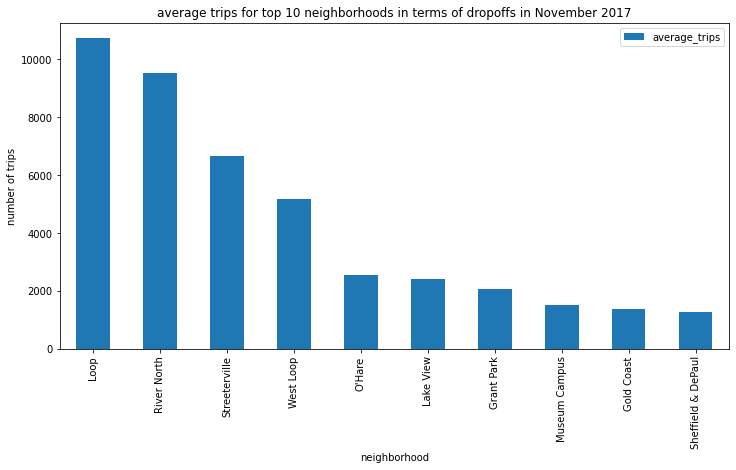

In [25]:
# graph the top 10 neighborhoods in terms of dropoffs
top_ten_graph = top_ten_df.plot(kind='bar', figsize=(12, 6))
plt.title('average trips for top 10 neighborhoods in terms of dropoffs in November 2017')
plt.ylabel('number of trips')
plt.xlabel('neighborhood')
top_ten_graph.set_xticklabels(top_ten_df['dropoff_location_name'])
plt.show()

# 4.d Top 10 neighborhood conclusion
- The top 4 neighborhoods have about 5000 or more average dropoffs
    - all others are under 4000
- The Loop neighborhood has the most dropoffs followed by River North

***Graph the number of rides for each taxi company***

In [26]:
# sort the company_trips df
trips = company_trips.sort_values(by='trips_amount', ascending=False)
# trips.head()

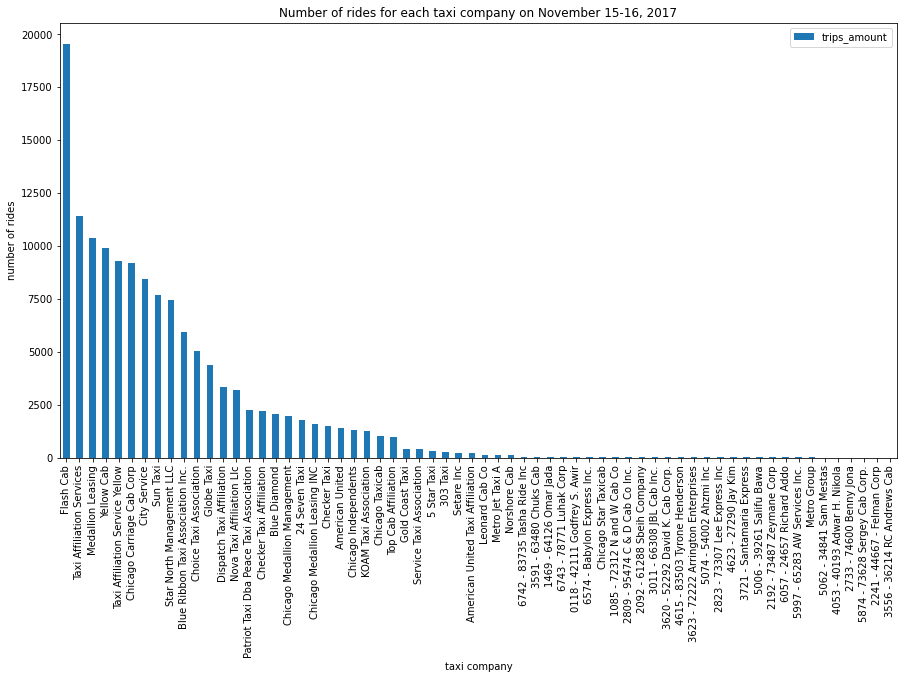

In [27]:
# graph the number of rides for each taxi company
trips_graph = trips.plot(kind='bar', figsize=(15, 8))
plt.title('Number of rides for each taxi company on November 15-16, 2017')
plt.ylabel('number of rides')
plt.xlabel('taxi company')
trips_graph.set_xticklabels(trips['company_name'])
plt.show()

# 4.d Taxi rides for Nov 15-16 conclusion
- Flash Cab has the most rides by far with around 19,000, this is about 8,000 more than Taxi Affiliation Services with about 11,000 rides
- Most companies have less than 2,500 rides
    - This may be because they have fewer drivers/cars
    - Many of the company names dont have the word 'cab' or 'taxi' in their name, so they may be hard to search for
- There is no explanation as to why Nov 15-16, 2017 were chosen for examination, possible reasons:
    - the dates fall on a Wednesday and Thursday, which is in the middle of the week, which are not heavy travel days. The invesitgators may be interested in lesser traveled days
    - The dates are roughly one week before Thanksgiving which is a major holiday in the United States

<div class="alert alert-success">
<b>Reviewer's comment</b>

Top dropoff locations and taxi companies were identified successfully

</div>

# Step 5 Test The Hypothesis

***Plan of Action***
- use cleaned up data from weather dataframe
- examine the dispersion between the populations
- create lists of the two populations to be tested
- Test the following hypothesis: "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays." using an independent samples t-test
    - Set the significance level to 5% - this is a standard level to use in these types of tests
    
***Test hypothesis:***
- Null hypothesis:
    - The average duration of rides from the Loop to O'Hare International Airport is the same on all Saturdays regardless of weather (rainy or non-rainy).
- Alternative hypothesis:
    - The average duration of rides from the Loop to O'Hare International Airport is differnt on rainy Saturdays compared to non-rainy Saturdays.

In [28]:
weather.head()

,start_ts,weather_conditions,duration_seconds,duration_minutes
0,2017-11-25 16:00:00,Good,2410.0,40.166667
1,2017-11-25 14:00:00,Good,1920.0,32.000000
2,2017-11-25 12:00:00,Good,1543.0,25.716667
3,2017-11-04 10:00:00,Good,2512.0,41.866667
4,2017-11-11 07:00:00,Good,1440.0,24.000000


***Examine the dispersion between the populations***

In [29]:
# create a table to examine the weather stats
weather_stats = weather.pivot_table(index='weather_conditions', 
                                        values='duration_minutes',
                                        aggfunc=['count', 'mean', np.var])
weather_stats.columns = ['num_rides', 'avg_ride_time_min', 'dispersion']
weather_stats

,num_rides,avg_ride_time_min,dispersion
weather_conditions,,,
Bad,148,40.153829,156.894290
Good,723,33.870885,166.171375


***Create queries for populations of interest***

In [30]:
# perform a query to acquire population of interest
good_days = weather.query('weather_conditions == "Good"')
print('query of "Good" weather days')
good_days.head()                                     

query of "Good" weather days


,start_ts,weather_conditions,duration_seconds,duration_minutes
0,2017-11-25 16:00:00,Good,2410.0,40.166667
1,2017-11-25 14:00:00,Good,1920.0,32.000000
2,2017-11-25 12:00:00,Good,1543.0,25.716667
3,2017-11-04 10:00:00,Good,2512.0,41.866667
4,2017-11-11 07:00:00,Good,1440.0,24.000000


In [31]:
# perform a query to acquire population of interest
bad_days = weather.query('weather_conditions == "Bad"')
print('query of "Bad" weather days')
bad_days.head() 

query of "Bad" weather days


,start_ts,weather_conditions,duration_seconds,duration_minutes
6,2017-11-04 16:00:00,Bad,2969.0,49.483333
30,2017-11-18 12:00:00,Bad,1980.0,33.000000
34,2017-11-04 17:00:00,Bad,2460.0,41.000000
51,2017-11-04 16:00:00,Bad,2760.0,46.000000
52,2017-11-18 12:00:00,Bad,2460.0,41.000000


***Create lists of the necessary populations for the test***

In [36]:
# creat a list of population data
good_days_list = list(good_days['duration_minutes'])
print('List of "Good" weather ride durations in minutes')
good_days_list[:10]

List of "Good" weather ride durations in minutes


[40.166666666666664,
 32.0,
 25.716666666666665,
 41.86666666666667,
 24.0,
 22.0,
 38.0,
 41.0,
 34.0,
 25.0]

In [37]:
# creat a list of population data
bad_days_list = list(bad_days['duration_minutes'])
print('List of "Bad" weather ride durations in minutes')
bad_days_list[:10]

List of "Bad" weather ride durations in minutes


[49.483333333333334,
 33.0,
 41.0,
 46.0,
 41.0,
 24.0,
 39.38333333333333,
 50.0,
 52.0,
 25.183333333333334]

***Test hypothesis using an independent samples t-test***
- Null hypothesis:
    - The average duration of rides from the Loop to O'Hare International Airport is the same on all Saturdays regardless of weather (rainy or non-rainy).
- Alternative hypothesis:
    - The average duration of rides from the Loop to O'Hare International Airport is differnt on rainy Saturdays compared to non-rainy Saturdays.

In [34]:
# set the significance level
alpha = 0.05 # 5% as the critical statistical significance level - this is standard for this type of test

results = st.ttest_ind(good_days_list, 
                       bad_days_list, 
                       equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis')
    print("Alternative hypothesis is true:\nThe average duration of rides from the Loop to O'Hare International Airport is differnt on rainy Saturdays compared to non-rainy Saturdays.")
    
if results.pvalue > alpha:
    print("Can't reject null hypothesis")
    print("Null hypothesis is true:\nThe average duration of rides from the Loop to O'Hare International Airport is the same on all Saturdays regardless of weather (rainy or non-rainy).")

p-value:  9.126383933880083e-08
Reject the null hypothesis
Alternative hypothesis is true:
The average duration of rides from the Loop to O'Hare International Airport is differnt on rainy Saturdays compared to non-rainy Saturdays.


In [35]:
weather_stats

,num_rides,avg_ride_time_min,dispersion
weather_conditions,,,
Bad,148,40.153829,156.894290
Good,723,33.870885,166.171375


# 5 Hypothesis Conclusion
- Tables and queries were performed to obtain lists of the populations of interest ("Good" or "Bad" weather conditions)
- The dispersion of the populations were compared to determine if the variance between the populations are similar or not
    - they are not similar, therefore I used the following parameter in the t-test: `equal_var=False`
- An independent samples t-test was performed to test the equality of the means of the two populations 
    - an alpha of 5% was used - this is standard for this type of test
- The following hypotheses were tested:
    - Null hypothesis:
        - The average duration of rides from the Loop to O'Hare International Airport is the same on all Saturdays regardless of weather (rainy or non-rainy).
    - Alternative hypothesis:
        - The average duration of rides from the Loop to O'Hare International Airport is differnt on rainy Saturdays compared to non-rainy Saturdays.
        
***Results***
- The null hypothesis is rejected, the alternative hypothesis is true: the average duration of rides from the Loop to O'Hare International Airport is differnt on rainy Saturdays compared to non-rainy Saturdays.
    - This is supported by the weather_stats table showing that the average ride time for bad days is 7 minutes longer than good days

<div class="alert alert-success">
<b>Reviewer's comment</b>

The null and alternative hypotheses were formulated correctly, an appropriate test was used, and the conclusion is consistent with test results.

</div>